# Advertising Sales Channel Prediction

### Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


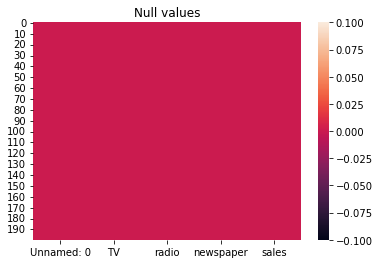

In [7]:
# cheaking the null values
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [8]:
df.isnull().sum().sum()

0

* there are no null values in data set

### Statistical summary

In [9]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
# droping unnamed column
df.drop(columns='Unnamed: 0', inplace=True)

In [11]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Data Analysis and visulaization


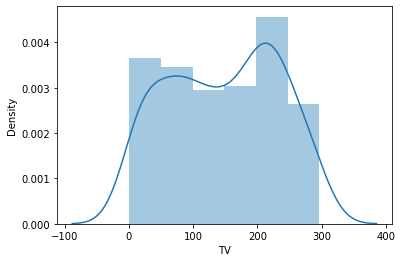

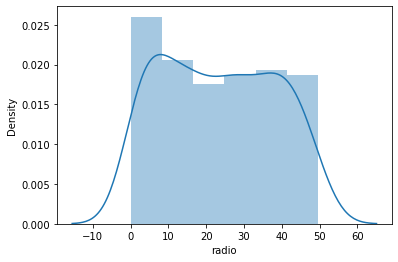

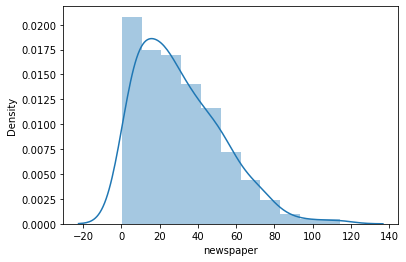

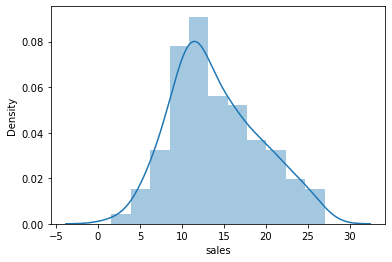

In [12]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])
    
plt.show()

## joint plot

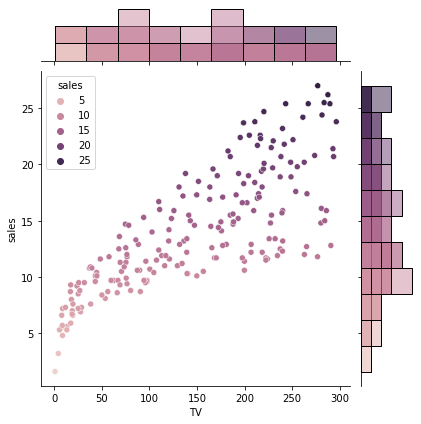

In [13]:
s=sns.JointGrid(data=df,x="TV", y="sales",hue="sales")
s.plot(sns.scatterplot, sns.histplot, color='b')
plt.show()

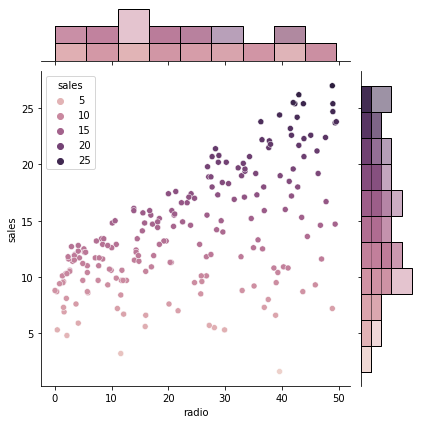

In [14]:
s=sns.JointGrid(data=df,x="radio", y="sales",hue="sales")
s.plot(sns.scatterplot, sns.histplot, color='b')
plt.show()

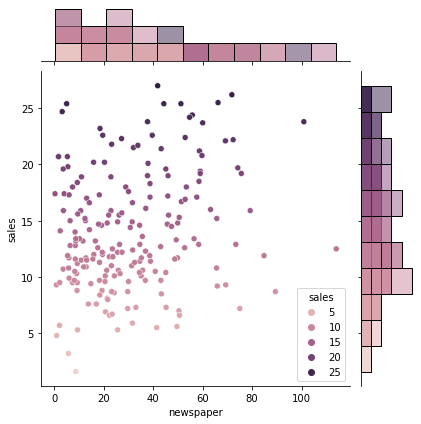

In [15]:
s=sns.JointGrid(data=df,x="newspaper", y="sales",hue="sales")
s.plot(sns.scatterplot, sns.histplot, color='b')
plt.show()

### Correlation

In [16]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


* Tv correlated with sale more than any other

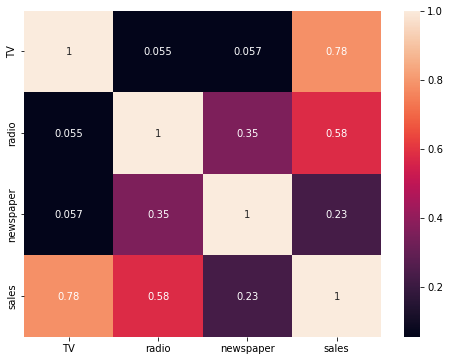

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

## LM-Plot

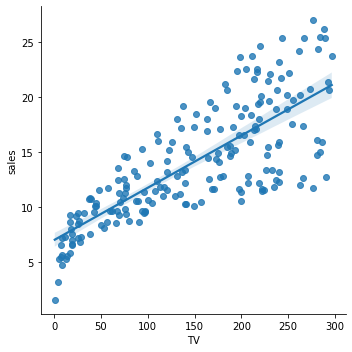

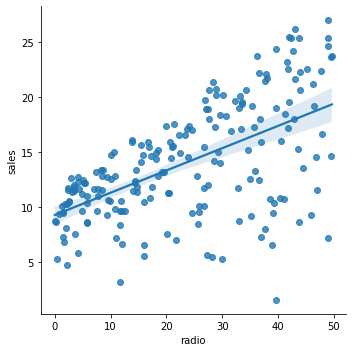

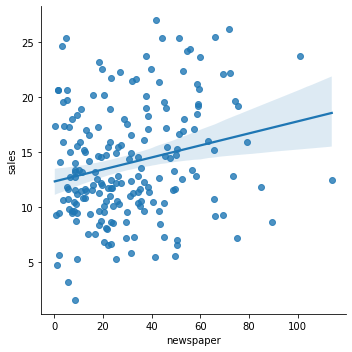

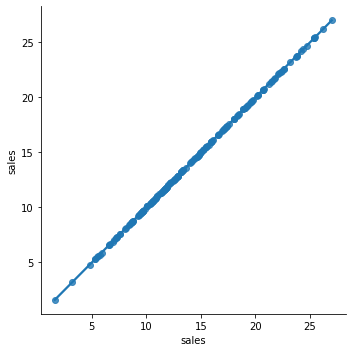

In [18]:
for i in df:
    sns.lmplot(x=i, y='sales',data=df)

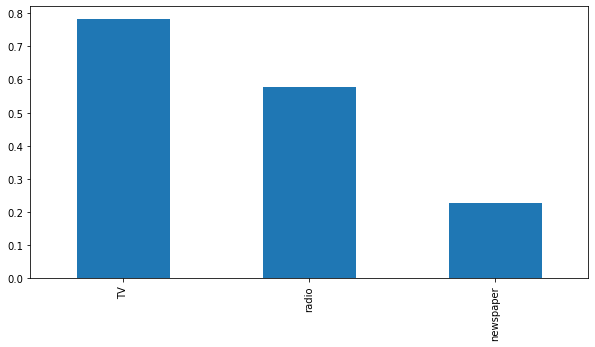

In [19]:
sns.set_palette
plt.figure(figsize=(10,5))
df.corr()['sales'].drop(['sales']).plot(kind='bar')
plt.show()

### Standard Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
X=df.drop(columns=['sales'])
Y=df['sales']

In [22]:
Scaler=StandardScaler()
X_scale=Scaler.fit_transform(X)

In [23]:
X_scale

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

### Checking multicollinearity between Features
### variance_inflation_factor (VIF)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_scale,i)for i in range(X_scale.shape[1])]
vif['Features']=X.columns
vif

,VIF,Features
0,1.004611,TV
1,1.144952,radio
2,1.145187,newspaper


* All VIF values are less than 5 it's means no multicollinearity

## Model Building

#### Spliting the data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=.2,random_state=5)

In [28]:
print('X train:',X_train.shape)
print('Y train:',Y_train.shape)
print('X test:',X_test.shape)
print('Y test:',Y_test.shape)

X train: (160, 3)
Y train: (160,)
X test: (40, 3)
Y test: (40,)


## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [30]:
lr=LinearRegression()

In [31]:
lr.fit(X_train,Y_train)

LinearRegression()

In [32]:
lr.score(X_train,Y_train)

0.8956962280033928

In [33]:
y_pred=lr.predict(X_test)

In [34]:
r2_score(Y_test,y_pred)

0.8984204533332627

## KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
knn = KNeighborsRegressor()

In [37]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [38]:
knn.score(X_train,Y_train)

0.9627454311312011

In [39]:
knn.score(X_test,Y_test)

0.9534380136164672

## Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor(n_estimators = 100 )

In [42]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [43]:
rf.score(X_train,Y_train)

0.9967367503512594

In [44]:
rf.score(X_test,Y_test)

0.9861306346619626

## Hyperparameter GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import  GradientBoostingRegressor

In [52]:
greid_param = [{    'learning_rate': [0.1,0.2,0.3,0.4],
                  'subsample'    : [0.2,0.06,0.5,1],
                  'n_estimators' : [100,200,300,400],
                  'max_depth'    : [7,8,9,1]}] 

In [53]:
abc = GridSearchCV(GradientBoostingRegressor(),
                   greid_param,
                   cv=5,
                   n_jobs = -1,
                   verbose=5)
abc.fit(X_train,Y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 2/5] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=9;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=8;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=8;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=7;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=7;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=7;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=7;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=7;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=6;, score=nan t

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4],
                          'max_depth': [7, 8, 9, 1],
                          'n_estimators': [100, 200, 300, 400],
                          'subsample': [0.2, 0.06, 0.5, 1]}],
             verbose=5)

In [54]:
abc.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 400, 'subsample': 0.5}

## Final model

In [55]:
model = GradientBoostingRegressor(learning_rate=0.1 ,n_estimators= 400, max_depth=8 ,subsample=0.5)

In [56]:
model.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=8, n_estimators=400, subsample=0.5)

In [57]:
model.score(X_test,Y_test)

0.985161295904234

<AxesSubplot:>

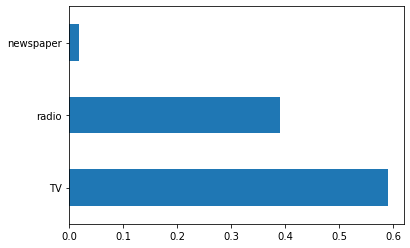

In [58]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')